In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
import matplotlib.pyplot as plt

/kaggle/input/dalidevchallenge/Sample - Superstore.csv


# Load in Data

In [2]:
df = pd.read_csv("/kaggle/input/dalidevchallenge/Sample - Superstore.csv")

In [3]:
df.head(2)

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,1.0,CA-2016-152156,11/8/2016,11/11/2016,NaN,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,NaN,2.0,0.0,41.9136
1,1,NaN,NaN,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3.0,0.0,219.5820


In [4]:
df.columns = df.columns.str.replace(' ', '') 

# Data Exploration/Visualization

<Axes: xlabel='CustomerName', ylabel='count'>

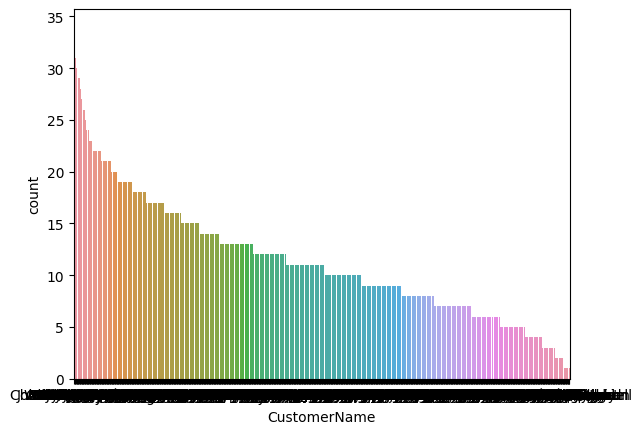

In [5]:
df['Country'].value_counts(), df['OrderID'].value_counts()
# #probably going to drop becuase won't tell us much about the profit

sns.barplot(x=df.CustomerName.value_counts().index, y=df.CustomerName.value_counts())

#remove this becuase everything is coming from the United States

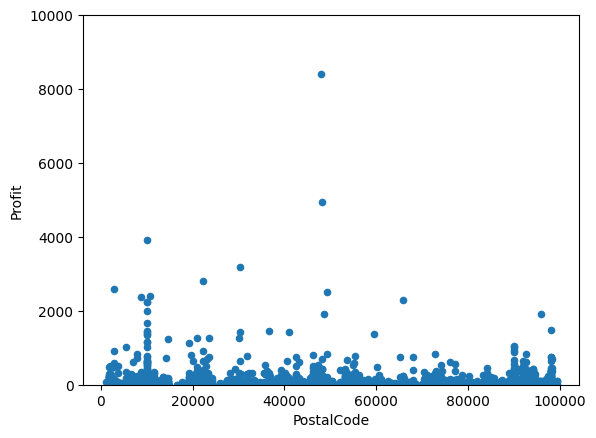

In [6]:
var = 'PostalCode'
data = pd.concat([df['Profit'].sort_values(), df[var]], axis=1)
data.plot.scatter(x=var, y='Profit', ylim=(0,10000));

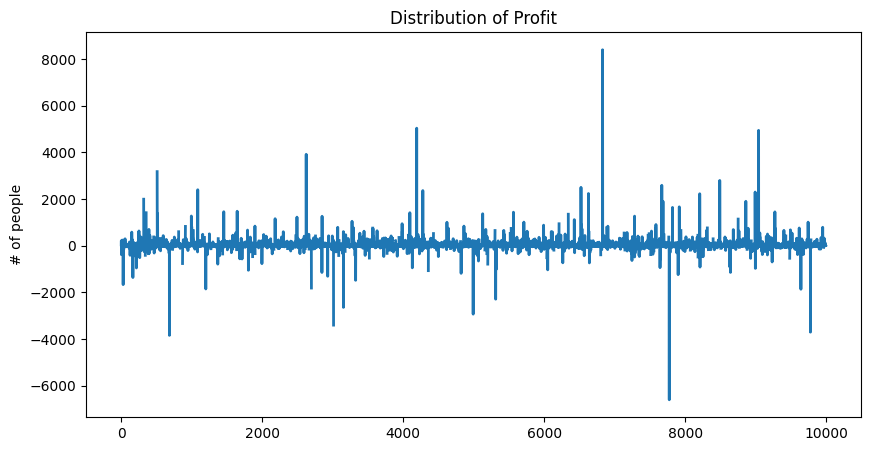

In [7]:
plt.figure(figsize=(10,5))
plt.plot(df.Profit,linewidth=2)
plt.title('Distribution of Profit')
plt.ylabel('# of people');

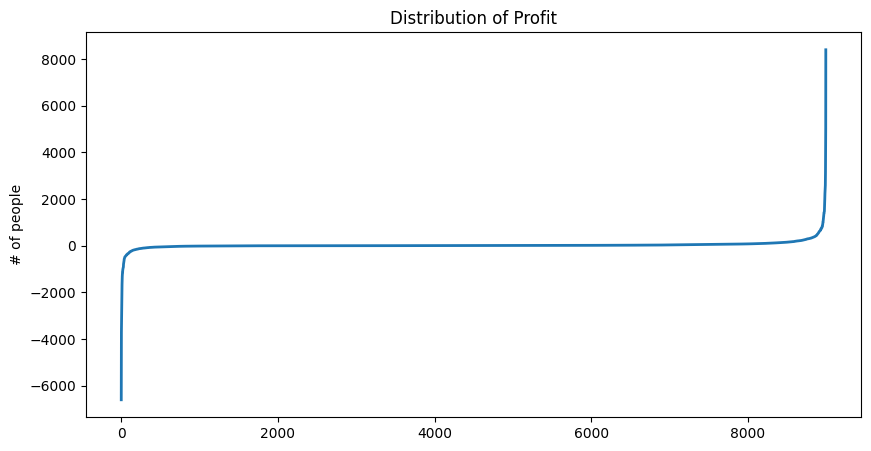

In [8]:
plt.figure(figsize=(10,5))
plt.plot(df.Profit.sort_values().reset_index(drop=True),linewidth=2)
plt.title('Distribution of Profit')
plt.ylabel('# of people');



# Data Prep

Check for missing Values

In [9]:
#got to take care of these null values later
df.isnull().sum()

Unnamed:0         0
RowID           999
OrderID         999
OrderDate       999
ShipDate        999
ShipMode        999
CustomerID      999
CustomerName    999
Segment         999
Country         999
City            999
State           999
PostalCode      999
Region          999
ProductID       999
Category        999
Sub-Category    999
ProductName     999
Sales           999
Quantity        999
Discount        999
Profit          999
dtype: int64

In [10]:
df.describe()

,Unnamed:0,RowID,PostalCode,Sales,Quantity,Discount,Profit
count,9994.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.00000,8995.000000
mean,4996.500000,4986.567426,55147.143413,230.864435,3.790773,0.15569,27.614049
std,2885.163629,2883.357953,32022.008929,624.590629,2.231843,0.20505,228.132397
min,0.000000,1.000000,1040.000000,0.444000,1.000000,0.00000,-6599.978000
25%,2498.250000,2491.500000,23223.000000,17.453000,2.000000,0.00000,1.734300
50%,4996.500000,4980.000000,55901.000000,54.792000,3.000000,0.20000,8.662000
75%,7494.750000,7475.500000,90004.000000,209.940000,5.000000,0.20000,29.364000
max,9993.000000,9994.000000,99301.000000,22638.480000,14.000000,0.80000,8399.976000


In [11]:
## Example Columns that are not numbers
    #Order-ID  *
    #ShipMode  *
    #CustomerName
    #Segment
    #Country  - drop
    #Region  *
    #ProductID
    #Catagory
    #Sub-Catagory
    #Product Name - drop
    


Going to drop the following columns..

In [12]:
df['CustomerName'] # not going to be a big predictor of profit
df['ProductName'] # catagory probably tells this info already
df['Country'] # Only has one value
todrop = ['CustomerName', 'ProductName', 'Country']
df.drop(todrop, inplace = True, axis = 1)

In [13]:
df['Region'].value_counts(), df['ShipMode'].value_counts(), df['Segment'].value_counts()

(Region
 West       2877
 East       2531
 Central    2127
 South      1460
 Name: count, dtype: int64,
 ShipMode
 Standard Class    5357
 Second Class      1747
 First Class       1389
 Same Day           502
 Name: count, dtype: int64,
 Segment
 Consumer       4643
 Corporate      2737
 Home Office    1615
 Name: count, dtype: int64)

In [14]:
#encoding Ship Mode
ship_mode_map = {"StandardClass": 0, "Second Class": 1, "First Class":2, "Same Day":3}
df['ShipMode'] = df['ShipMode'].map(ship_mode_map)

#encoding Segment
segment_mode_map = {"Consumer": 0, "Corporate": 1, "Home Office":2}
df['Segment'] = df['Segment'].map(segment_mode_map)

#encoding Region Column
region_map = {"West": 0, "East": 1, "Central":2, "South":4}
df['Region'] = df['Region'].map(region_map)

**Let's one hot encode the Sub-Category Column instead of mapping**

In [15]:
print(df['Sub-Category'].value_counts())
one_hot = pd.get_dummies(df['Sub-Category']).astype(int)
# Drop column B as it is now encoded
df = df.drop('Sub-Category',axis = 1)
# Join the encoded df
df = df.join(one_hot)

Sub-Category
Binders        1370
Paper          1233
Furnishings     855
Phones          795
Storage         763
Art             717
Accessories     700
Chairs          560
Appliances      417
Labels          329
Tables          287
Envelopes       225
Bookcases       208
Fasteners       198
Supplies        171
Machines        104
Copiers          63
Name: count, dtype: int64


In [16]:
df.drop(['OrderID', 'OrderDate', 'ShipDate', 'CustomerID', 'City', 'State', 'ProductID', 'Category'], axis = 1, inplace = True)

In [17]:
df.dropna(inplace = True)

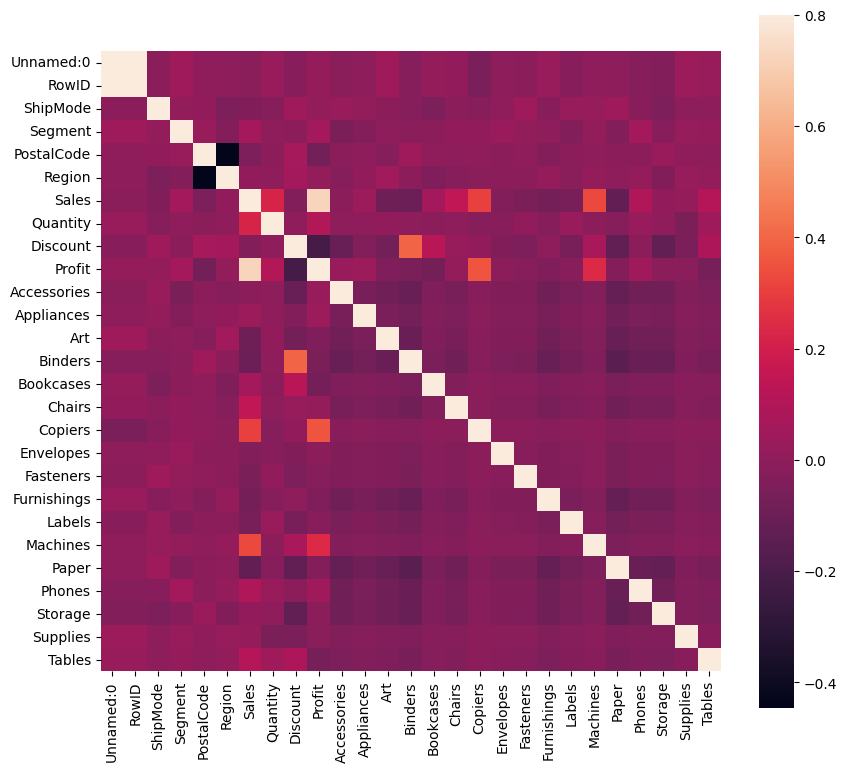

In [18]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Modeling

In [19]:
target = df['Profit']

train_data = df.drop('Profit', axis=1)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, target, random_state=0, test_size=0.2, shuffle=False)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC


In [22]:
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [23]:
from sklearn.pipeline import make_pipeline
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005))


In [24]:
X_train.shape

(1260, 26)

In [25]:
y_train.shape

(1260,)

In [26]:
score_lasso = rmsle_cv(lasso)
score_lasso.mean()
print("\nLasso score: {:.4f} ({:.4f})\n".format(score_lasso.mean(), score_lasso.std()))


Lasso score: 130.6829 (26.3194)

